In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/nhanes.csv')

In [6]:
df.to_csv('Nhanes.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   Gender              5000 non-null   object 
 2   Age                 5000 non-null   int64  
 3   Race                5000 non-null   object 
 4   Education           3584 non-null   object 
 5   MaritalStatus       3585 non-null   object 
 6   RelationshipStatus  3585 non-null   object 
 7   Insured             4993 non-null   object 
 8   Income              4623 non-null   float64
 9   Poverty             4675 non-null   float64
 10  HomeRooms           4972 non-null   float64
 11  HomeOwn             4972 non-null   object 
 12  Work                3842 non-null   object 
 13  Weight              4969 non-null   float64
 14  Height              4841 non-null   float64
 15  BMI                 4834 non-null   float64
 16  Pulse 

In [8]:
df.head()

,id,Gender,Age,Race,Education,MaritalStatus,RelationshipStatus,Insured,Income,Poverty,...,Diabetes,DiabetesAge,nPregnancies,nBabies,SleepHrsNight,PhysActive,PhysActiveDays,AlcoholDay,AlcoholYear,SmokingStatus
0,62163,male,14,Asian,NaN,NaN,NaN,Yes,100000.0,4.07,...,No,NaN,NaN,NaN,NaN,No,1.0,NaN,NaN,NaN
1,62172,female,43,Black,High School,NeverMarried,Single,Yes,22500.0,2.02,...,No,NaN,3.0,2.0,8.0,No,2.0,3.0,104.0,Current
2,62174,male,80,White,College Grad,Married,Committed,Yes,70000.0,4.30,...,No,NaN,NaN,NaN,9.0,No,7.0,NaN,0.0,Never
3,62174,male,80,White,College Grad,Married,Committed,Yes,70000.0,4.30,...,No,NaN,NaN,NaN,9.0,No,5.0,NaN,0.0,Never
4,62175,male,5,White,NaN,NaN,NaN,Yes,12500.0,0.39,...,No,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [9]:
df['Weight_lbs']  = df['Weight'] * 2.2

In [ ]:
# Processing NAs by converting to the category 'Unknown' in categorical variables or 0 in the numerical ones and concatenating both to form an alternate df
objs = df.select_dtypes(include='object')
objs.Education.unique()

objs = objs.replace(np.NaN, 'Unknown')

nums = df.select_dtypes(exclude='object')
nums = nums.replace(np.NaN, 0)

df2 = pd.concat([objs, nums], axis=1)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

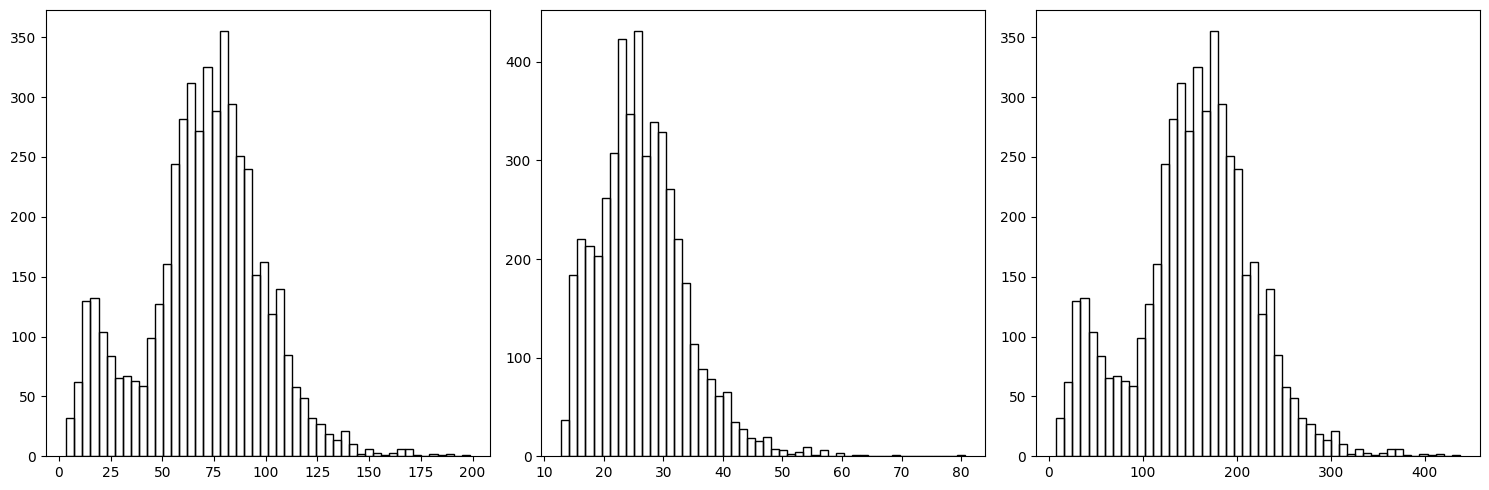

In [32]:
# Plotting the Weight, BMI and Weight_lbs histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(df.Weight.dropna(), bins=50, fill=False)
axes[1].hist(df.BMI.dropna(), bins=50, fill=False)
axes[2].hist(df.Weight_lbs.dropna(), bins=50, fill=False)

plt.tight_layout();

In [33]:
# Finding the average 60-second pulse rate of all the participants
avgPulse = df.Pulse.mean(skipna=True)
print(f'The average 60-second pulse rate of all the participants is {avgPulse:.5f}')

The average 60-second pulse rate of all the participants is 73.63382


In [34]:
# Finding the variance and standard deviation for income among all the participants
incomeVar, incomeSTD = df.Income.var(skipna=True), df.Income.std(skipna=True)
print(f'The variance and standard deviation for income among all the participants are {incomeVar:.1f} and {incomeSTD:.3f} respectively')

The variance and standard deviation for income among all the participants are 1121564067.9 and 33489.761 respectively


In [35]:
# Selecting the columns to be compared
comparisonDF = df[['Age', 'Weight', 'Height', 'Diabetes', 'Gender', 'SmokingStatus', 'BMI', 'AlcoholYear', 'RelationshipStatus']]
comparisonDF.head()

,Age,Weight,Height,Diabetes,Gender,SmokingStatus,BMI,AlcoholYear,RelationshipStatus
0,14,49.4,168.9,No,male,NaN,17.3,NaN,NaN
1,43,98.6,172.0,No,female,Current,33.3,104.0,Single
2,80,95.8,168.1,No,male,Never,33.9,0.0,Committed
3,80,95.8,168.1,No,male,Never,33.9,0.0,Committed
4,5,23.9,119.8,No,male,NaN,16.7,NaN,NaN


In [36]:
comparisonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Weight              4969 non-null   float64
 2   Height              4841 non-null   float64
 3   Diabetes            4936 non-null   object 
 4   Gender              5000 non-null   object 
 5   SmokingStatus       3587 non-null   object 
 6   BMI                 4834 non-null   float64
 7   AlcoholYear         2984 non-null   float64
 8   RelationshipStatus  3585 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 351.7+ KB


In [37]:
hues = ['Gender', 'Diabetes', 'SmokingStatus']

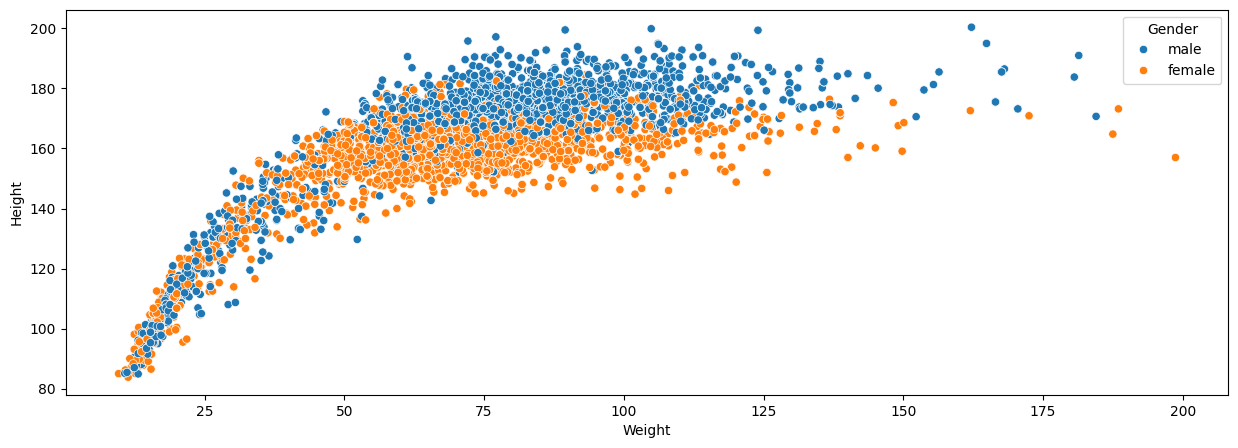

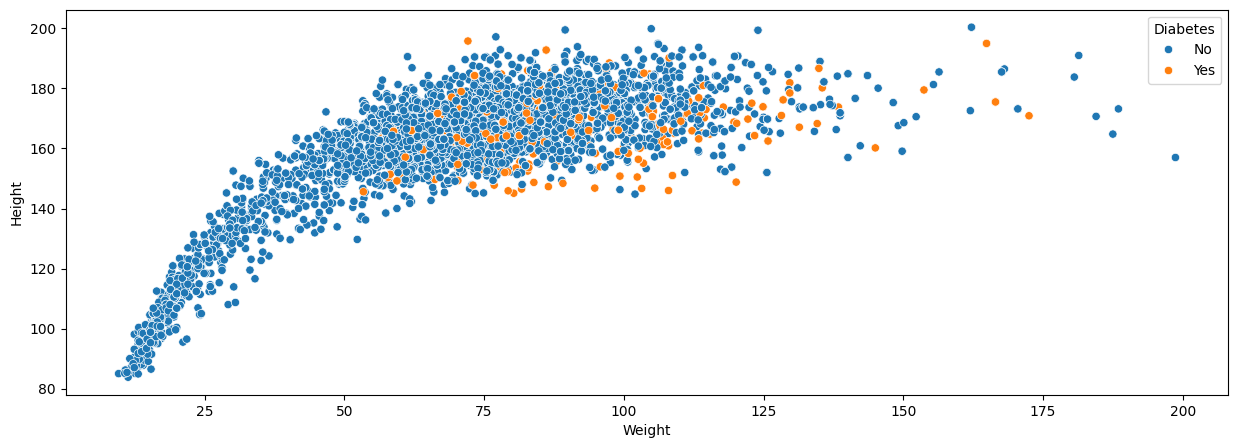

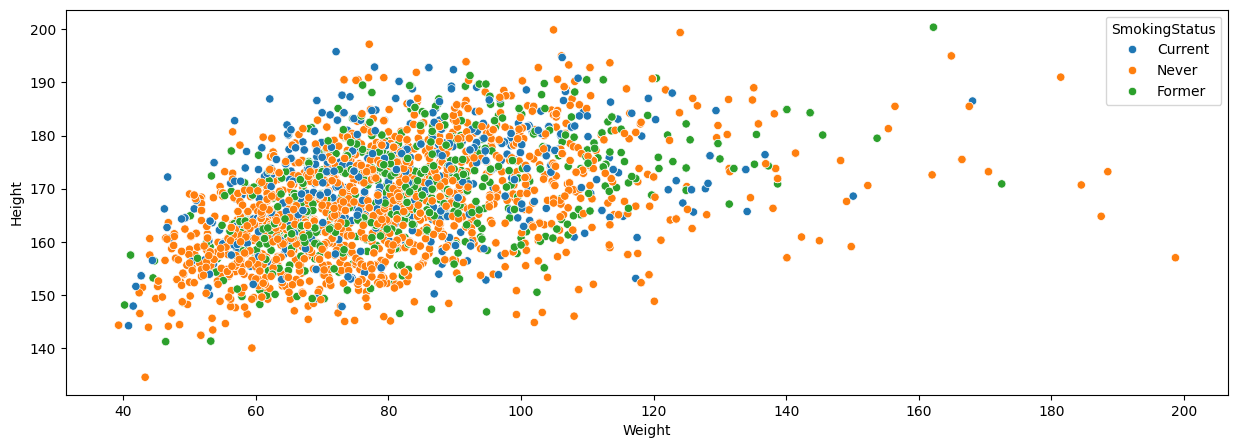

In [38]:
for i in hues:
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.scatterplot(data=comparisonDF, x='Weight', y='Height', hue=i, ax=ax)
    plt.show()

Age and Gender
BMI and Diabetes
Alcohol Year and Relationship Status

In [39]:
from scipy.stats import ttest_ind

In [40]:
comparisonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Weight              4969 non-null   float64
 2   Height              4841 non-null   float64
 3   Diabetes            4936 non-null   object 
 4   Gender              5000 non-null   object 
 5   SmokingStatus       3587 non-null   object 
 6   BMI                 4834 non-null   float64
 7   AlcoholYear         2984 non-null   float64
 8   RelationshipStatus  3585 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 351.7+ KB


In [41]:
df.groupby('Gender')['Age'].mean()

Gender
female    37.267335
male      36.150898
Name: Age, dtype: float64

In [42]:
# For the t-test of the male and female ages
male_ages = df[df['Gender'] == 'male']['Age']
female_ages = df[df['Gender'] == 'female']['Age']

In [43]:
# Why ttest_ind? The ages of the males are independent from the ages of the females
t_stat, p_value = ttest_ind(male_ages, female_ages)
print(f'Because the p_value is {p_value} and higher than the critical value of 0.05, There is no significant difference between ages of the males and of the females')

Because the p_value is 0.0802033026651036 and higher than the critical value of 0.05, There is no significant difference between ages of the males and of the females


In [44]:
# For the t-test of the Diabetes groups and BMI
bmi_diab_df = df[['BMI', 'Diabetes']]

bmi_diab_df.dropna(inplace=True)

C:\Users\tobij\AppData\Local\Temp\ipykernel_5048\4202740662.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi_diab_df.dropna(inplace=True)


In [45]:
bmi_no_diab = bmi_diab_df[bmi_diab_df.Diabetes == 'No']['BMI']
bmi_yes_diab = bmi_diab_df[bmi_diab_df.Diabetes == 'Yes']['BMI']

In [46]:
t_stat, p_value = ttest_ind(bmi_yes_diab, bmi_no_diab)

In [47]:
print(f'Because the p_value is {p_value} and lower than the critical value of 0.05, There is a significant difference between BMIs of those with and without diabetes')

Because the p_value is 6.596522206577126e-64 and lower than the critical value of 0.05, There is a significant difference between BMIs of those with and without diabetes


In [48]:
rel_stat_df = df[['RelationshipStatus', 'AlcoholYear']]
rel_stat_df.dropna(inplace=True)

C:\Users\tobij\AppData\Local\Temp\ipykernel_5048\4025405537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_stat_df.dropna(inplace=True)


In [49]:
rel_stat_df

,RelationshipStatus,AlcoholYear
1,Single,104.0
2,Committed,0.0
3,Committed,0.0
5,Committed,104.0
7,Committed,2.0
...,...,...
4991,Single,5.0
4992,Single,5.0
4997,Committed,4.0
4998,Single,0.0


In [50]:
single_alcyr = rel_stat_df[rel_stat_df.RelationshipStatus == 'Single']['AlcoholYear']
comm_alcyr = rel_stat_df[rel_stat_df.RelationshipStatus == 'Committed']['AlcoholYear']

In [51]:
t_stat, p_value = ttest_ind(single_alcyr, comm_alcyr)

In [52]:
print(f'Because the p_value is {p_value} and lower than the critical value of 0.05, There is a significant difference between the alcohol years of those single and those in committed relationships')

Because the p_value is 2.1730939323364409e-07 and lower than the critical value of 0.05, There is a significant difference between the alcohol years of those single and those in committed relationships
